# Gibbs Sampling

### Statistical Data Analysis II

#### Task 1
$$P(C|R,S,W) = P(C|R,S) = \frac{P(C,R,S)}{P(R,S)} = \frac{P(C)P(R|C)P(S|C)}{\sum_{C} P(C)P(R|C)P(S|C)}$$

$$P(R|C,S,W) = \frac{P(R,C,S,W)}{P(C,S,W)} = \frac{P(C)P(R|C)P(S|C)P(W|R,S)}{\sum_{R} P(C)P(R|C)P(S|C)P(W|R,S)} = \frac{P(R|C)P(W|R,S)}{\sum_{R} P(R|C)P(W|R,S)}$$

##### Given observed values:

Probability that it's cloudy, given that there is rain, the sprinkler is on and the grass is wet:

$$P(C=T|R=T,S=T,W=T) = \frac{0.5\cdot0.8\cdot0.1}{0.5\cdot0.8\cdot0.1+0.5\cdot0.2\cdot0.5} = \frac{0.04}{0.09} = 0.44(4)$$

Probability that it's not cloudy, given that there is rain, the sprinkler is on and the grass is wet:

$$P(C=F|R=T,S=T,W=T) = 1 - P(C=T|R=T,S=T,W=T) = 0.55(5)$$

Probability that it's cloudy, given that there is no rain, the sprinkler is on and the grass is wet:

$$P(C=T|R=F,S=T,W=T) = \frac{0.5\cdot0.2\cdot0.1}{0.5\cdot0.2\cdot0.1+0.5\cdot0.8\cdot0.5} = \frac{0.01}{0.21} = 0.0476$$

Probability that it's not cloudy, given that there is no rain, the sprinkler is on and the grass is wet:

$$P(C=F|R=F,S=T,W=T) = 1 - P(C=T|R=F,S=T,W=T) = 0.9524$$

Probability of rain, given that it's cloudy, the sprinkler is on and the grass is wet:

$$P(R=T|C=T,S=T,W=T) = \frac{0.8\cdot0.99}{0.8\cdot0.99+0.2\cdot0.9} = \frac{0.792}{0.972} = 0.8148$$

Probability of no rain, given that it's cloudy, the sprinkler is on and the grass is wet:

$$P(R=F|C=T,S=T,W=T) = 1- P(R=T|C=T,S=T,W=T) = 0.1852$$

Probability of rain, given that it's not cloudy, the sprinkler is on and the grass is wet.

$$P(R=T|C=F,S=T,W=T) = \frac{0.2\cdot0.99}{0.2\cdot0.99+0.8\cdot0.9} = \frac{0.198}{0.918} = 0.2157$$

Probability of no rain, given that it's not cloudy, the sprinkler is on and the grass is wet.

$$P(R=F|C=F,S=T,W=T) = 1 - P(R=T|C=F,S=T,W=T) = 0.7843$$

In [153]:
# Probability that it's cloudy given that the sprinkler is on, grass is wet and there is no rain (P_cloudy[0]) or 
# there is rain (P_cloudy[1])
P_cloudy = [0.0476, 0.4444444]
# Probability that there's rain given that the sprinkler is on, grass is wet and it's not cloudy (P_rain[0]) or 
# there it's cloudy (P_rain[1])
P_rain = [0.2157, 0.8148]

In [154]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt

#### Task 2

In [155]:
def gibbs_sampler(num_samples):
    initial_C = binom.rvs(1, 0.5)
    initial_R = binom.rvs(1, 0.5)
    samples = np.empty((num_samples, 2))
    #samples[0] = [1,2]
    previous_C = initial_C
    previous_R = initial_R
    for t in range(num_samples):
        current_C = binom.rvs(1, P_cloudy[previous_R])
        current_R = binom.rvs(1, P_rain[current_C])
        samples[t] = [current_C, current_R]
        previous_C = current_C
        previous_R = current_R
    return samples

In [156]:
def estimate_rain(samples):
    RT = np.count_nonzero(samples[:,1])
    return RT/samples.shape[0]

def plot_frequencies(variable: str, samples: list):
    
    if variable == 'cloudy': index = 0
    elif variable == 'rain': index = 1
    else: return None
    time_range = np.arange(1,samples[0].shape[0]+1)
    for i,chain in enumerate(samples):
        frequencies = []
        count = 0
        for t in range(chain.shape[0]):
            if chain[t,index] == 1:
                count += 1
            frequencies.append(count/(t+1))
        plt.plot(time_range, frequencies, label="run "+str(i))
    plt.title("Relative frequencies of "+variable+" = T against time.")
    plt.xlabel("time")
    plt.ylabel("frequency of "+variable+" = T")
    plt.legend()
    plt.show()


#### Task 3

In [157]:
print("Estimated marginal probabilities of rain given that the sprinkler is on and the grass is wet based on 100 samples \
from 200 independent runs.")
est_100samples = []
for i in range(200):
    samples100 = gibbs_sampler(100)
    est_100samples.append(estimate_rain(samples100))
print(est_100samples)
print("Mean:", np.mean(est_100samples), "Variance:", np.std(est_100samples)**2)

Estimated marginal probabilities of rain given that the sprinkler is on and the grass is wet based on 100 samples from 200 independent runs.
[0.32, 0.27, 0.29, 0.39, 0.26, 0.32, 0.31, 0.22, 0.4, 0.25, 0.33, 0.3, 0.33, 0.32, 0.28, 0.39, 0.48, 0.23, 0.32, 0.44, 0.25, 0.3, 0.26, 0.22, 0.3, 0.34, 0.39, 0.32, 0.29, 0.32, 0.28, 0.28, 0.41, 0.28, 0.34, 0.39, 0.36, 0.16, 0.36, 0.4, 0.37, 0.38, 0.33, 0.34, 0.31, 0.37, 0.31, 0.26, 0.33, 0.52, 0.33, 0.36, 0.38, 0.35, 0.38, 0.36, 0.29, 0.23, 0.32, 0.21, 0.39, 0.33, 0.27, 0.26, 0.38, 0.23, 0.5, 0.36, 0.37, 0.31, 0.3, 0.34, 0.32, 0.36, 0.31, 0.33, 0.31, 0.31, 0.3, 0.33, 0.3, 0.28, 0.41, 0.41, 0.18, 0.37, 0.37, 0.31, 0.36, 0.26, 0.41, 0.31, 0.29, 0.38, 0.3, 0.34, 0.31, 0.35, 0.25, 0.2, 0.34, 0.27, 0.29, 0.28, 0.35, 0.39, 0.3, 0.26, 0.38, 0.32, 0.4, 0.29, 0.24, 0.28, 0.23, 0.44, 0.34, 0.36, 0.2, 0.42, 0.35, 0.37, 0.3, 0.33, 0.22, 0.44, 0.24, 0.31, 0.31, 0.24, 0.33, 0.38, 0.36, 0.43, 0.38, 0.36, 0.39, 0.28, 0.39, 0.32, 0.31, 0.38, 0.28, 0.39, 0.42, 0.4

Plot for the last run:


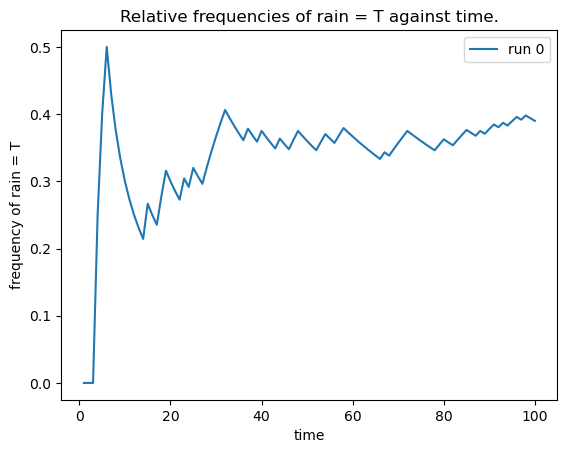

In [158]:
print("Plot for the last run:")
plot_frequencies("rain", [samples100])

#### Task 4

In [159]:
samples50k_1 = gibbs_sampler(50000)
samples50k_2 = gibbs_sampler(50000)

#### Task 5

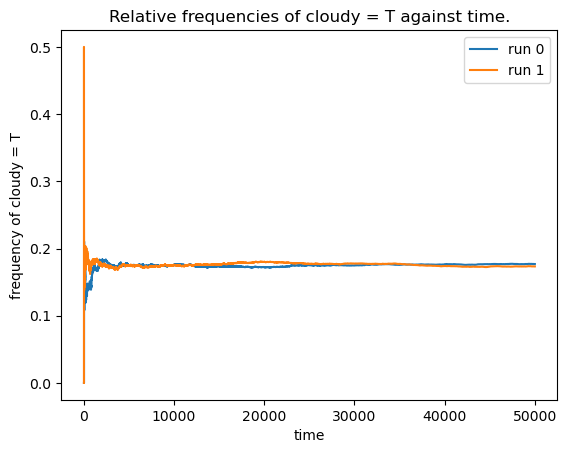

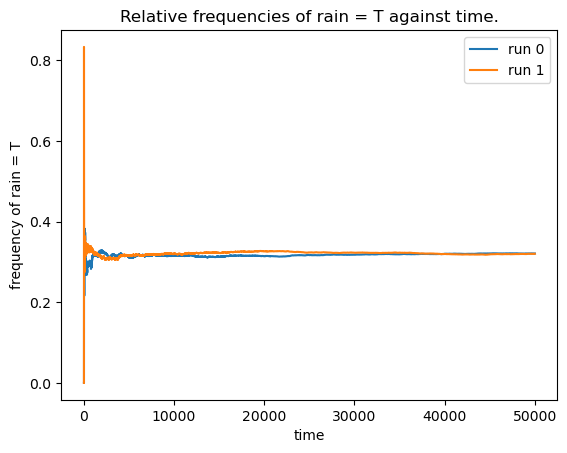

In [160]:
plot_frequencies('cloudy', [samples50k_1, samples50k_2])
plot_frequencies('rain', [samples50k_1, samples50k_2])

Based on these plots, we can see that frequencies are stabilizing after around 8 000 time steps. There are small fluctuations from around 8 000 to 15 000, but after the values are nearly the same. I'd suggest that burn-in time falls into around 8 000 time steps.

#### Task 6

In [161]:
def plot_autocorrelation(samples, max_lags=30):
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    
    axes[0].acorr(samples[:,0] - np.mean(samples[:,0]), maxlags = max_lags)
    axes[0].set_title('Auto-correlation for samples of C (cloudy)')
    axes[1].acorr(samples[:,1] - np.mean(samples[:,1]), maxlags = max_lags)
    axes[1].set_title('Auto-correlation for samples of R (rain)')

Plots for the first run:


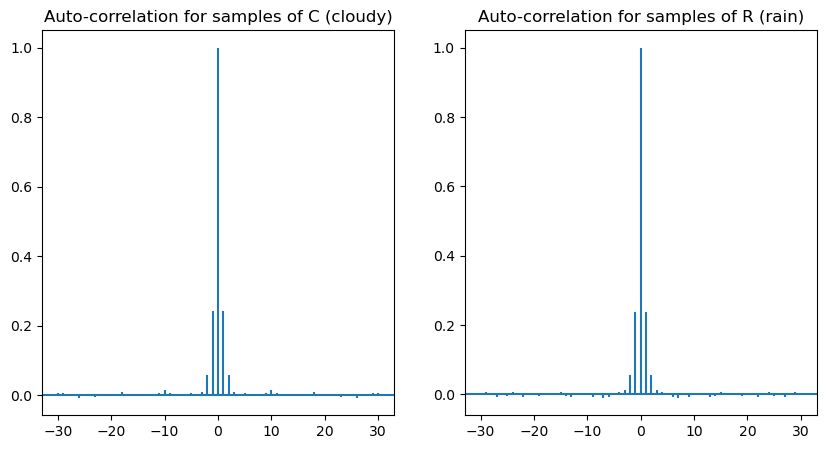

In [162]:
print("Plots for the first run:")
plot_autocorrelation(samples50k_1)

Plots for the second run:


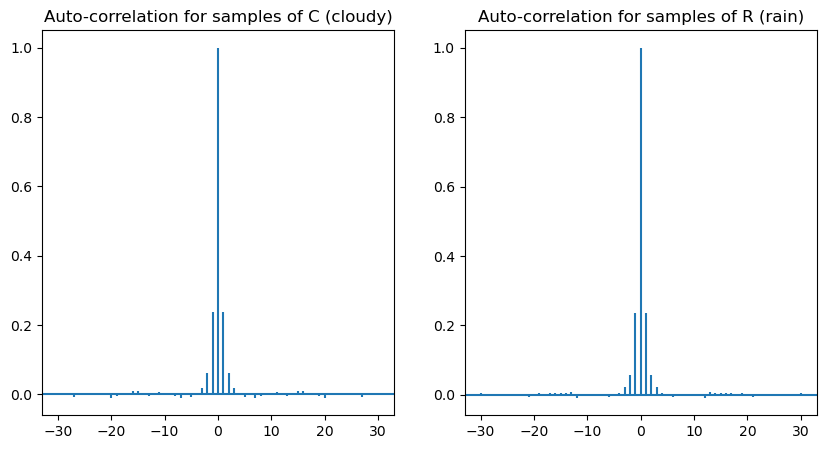

In [164]:
print("Plots for the second run:")
plot_autocorrelation(samples50k_2)

Given above plots I'd suggest that the interval for drawing approximately independent samples is around 8 time steps.

#### Task 7

In [165]:
def gibbs_sampler_version2(num_samples, burn_in, thinning_out):
    initial_C = binom.rvs(1, 0.5)
    initial_R = binom.rvs(1, 0.5)
    samples = np.empty((num_samples, 2))
    previous_C = initial_C
    previous_R = initial_R
    for t in range(burn_in):
        current_C = binom.rvs(1, P_cloudy[previous_R])
        current_R = binom.rvs(1, P_rain[current_C])
        previous_C = current_C
        previous_R = current_R
    count = 0
    sampled = 0
    while sampled < num_samples:
        current_C = binom.rvs(1, P_cloudy[previous_R])
        current_R = binom.rvs(1, P_rain[current_C])
        previous_C = current_C
        previous_R = current_R
        count += 1
        if count%thinning_out == 0:
            samples[sampled] = [current_C, current_R]
            sampled += 1
    return samples

#### Task 8

In [169]:
print("Estimated marginal probabilities of rain given that the sprinkler is on and the grass is wet based on 100 samples \
from 200 independent runs after the suggested burn-in time and thinning-out.")
est_new_100samples = []
for i in range(200):
    new_samples100 = gibbs_sampler_version2(100, 8000, 8)
    est_new_100samples.append(estimate_rain(new_samples100))
print(est_new_100samples)
print("Mean:", np.mean(est_new_100samples), "Variance:", np.std(est_new_100samples)**2)

Estimated marginal probabilities of rain given that the sprinkler is on and the grass is wet based on 100 samples from 200 independent runs after the suggested burn-in time and thinning-out.
[0.37, 0.34, 0.28, 0.33, 0.39, 0.26, 0.36, 0.39, 0.33, 0.32, 0.38, 0.29, 0.31, 0.31, 0.24, 0.34, 0.31, 0.32, 0.35, 0.35, 0.3, 0.37, 0.3, 0.25, 0.27, 0.25, 0.31, 0.3, 0.25, 0.33, 0.31, 0.38, 0.36, 0.32, 0.4, 0.25, 0.31, 0.38, 0.33, 0.32, 0.27, 0.4, 0.29, 0.28, 0.32, 0.31, 0.41, 0.32, 0.3, 0.41, 0.36, 0.29, 0.38, 0.39, 0.33, 0.37, 0.41, 0.3, 0.29, 0.34, 0.32, 0.29, 0.31, 0.43, 0.35, 0.3, 0.22, 0.3, 0.3, 0.52, 0.35, 0.28, 0.28, 0.3, 0.36, 0.3, 0.27, 0.38, 0.34, 0.29, 0.34, 0.3, 0.3, 0.32, 0.39, 0.34, 0.4, 0.29, 0.29, 0.31, 0.36, 0.32, 0.27, 0.24, 0.32, 0.35, 0.27, 0.38, 0.31, 0.29, 0.31, 0.35, 0.28, 0.26, 0.34, 0.36, 0.39, 0.25, 0.37, 0.3, 0.36, 0.26, 0.29, 0.33, 0.33, 0.39, 0.35, 0.24, 0.36, 0.27, 0.33, 0.36, 0.27, 0.32, 0.33, 0.31, 0.38, 0.44, 0.32, 0.35, 0.32, 0.31, 0.23, 0.33, 0.36, 0.28, 0.28, 0.

Estimating marginal probability of rain by drawing 100 samples, considering burn-in and thinning_out, have given slightly different results than just taking first 100 samples. After 200 runs, we obtained very similar mean of probabilities, but visibly different variance. Therefore, in improved version of sampler, we get more consistent results.

#### Task 9
$$P(R=T|S=T,W=T) = \frac{P(R=T, S=T, W=T}{P(S=T, W=T} = \frac{\sum_{C} P(C)P(R=T|C)P(S=T|C)P(W=T|S=T,R=T)}{\sum_{R} \sum_{C} P(C)P(R|C)P(S=T|C)P(W=T|S=T,R)} = \frac{P(C=T)P(R=T|C=T)P(S=T|C=T)P(W=T|S=T,R=T) + P(C=F)P(R=T|C=F)P(S=T|C=F)P(W=T|S=T,R=T)}{\sum_{R} P(C=T)P(R|C=T)P(S=T|C=T)P(W=T|S=T,R) + P(C=F)P(R|C=F)P(S=T|C=F)P(W=T|S=T,R)} = \frac{0.5\cdot0.8\cdot0.1\cdot0.99 + 0.5\cdot0.2\cdot0.5\cdot0.99}{0.5\cdot0.8\cdot0.1\cdot0.99 + 0.5\cdot0.2\cdot0.5\cdot0.99 + 0.5\cdot0.2\cdot0.1\cdot0.9 + 0.5\cdot0.8\cdot0.5\cdot0.9} = \frac{0.0891}{0.0891+0.189} = \frac{0.0891}{0.2781} = 0.3204$$

As we can see, marginal probabilities of rain that we obtained from Gibbs samppling are close to the value computed analytically. Results from a sampler with implemented burn-in and thinning-out were more consistent, but means of probabilities for multiple independent runs of both samplers were very similar to the real value.

In [170]:
def rubin_gelman(num_chains, burn_in):
    chains = []
    for i in range(num_chains):
        samples = gibbs_sampler(burn_in*2)
        chains.append(samples[burn_in:])
    W = 0
    B = 0
    means = [np.mean(chain) for chain in chains]
    mean_of_means = np.mean(means)
    for chain in chains:
        W += np.std(chain)**2
        B += (np.mean(chain) - mean_of_means)**2
    W = W/num_chains
    B = B*burn_in/(num_chains - 1)
    estimated_var_theta = (1 - 1/burn_in)*W + 1/burn_in*B
    R = np.sqrt(estimated_var_theta/W)
    print("Gelmen-Rubin Diagnostic: ", R)
    return R

In [171]:
rubin_gelman(10, 8000)

Gelmen-Rubin Diagnostic:  1.0000364121893837


1.0000364121893837

Based on Gelman and Rubin convergence diagnostic we can observe, that our sampler has reached covergence after a given burn-in time.
